In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MyML import *

In [2]:
def activation(X):
    return(np.tanh(X))
def linearh(X, hidden):
    return(X*wh + hidden*wh2 + bh)
def linearo(X):
    return(X*wout+bout)
def rnnlayer(X, hidden):
    hidden = activation(linearh(X,hidden))
    output = activation(linearo(hidden))
    return output, hidden
wh = np.random.rand(1)[0]
bh = np.random.rand(1)[0]
wh2 = np.random.rand(1)[0]
wout = np.random.rand(1)[0]
bout = np.random.rand(1)[0]

array([-0.66751638])

In [15]:
hidden = [0]
X = np.array([.5,.5]).reshape(1,2)

In [120]:
outs = np.empty((1000,2))
outs[0,] = X
hiddens = np.empty((1000,2))
hiddens[0,] = hidden
for i in range(1,1000):
    X, hidden = rnnlayer(X, hidden)
    outs[i,] = X
    hiddens[i,] = hidden

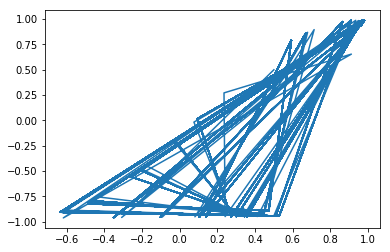

In [121]:
plt.plot(outs[:,0],outs[:,1])

In [4]:
X = np.linspace(0,10,2000)
Y = .5*np.sin(2*X)

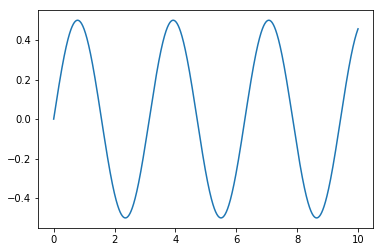

In [5]:
plt.plot(X,Y)

In [6]:
def cost(y, yhat):
    return((y-yhat)**2)
def sumcost(cost):
    return np.sum(cost)
wout = np.random.randn()
def backward(outputs,y,hiddens, inputs,lr, wout,wh2,bh,wh,bout):
    C = np.sum((y - outputs)**2)
    gradwh = 0
    gradwh2 = 0
    gradwout = 0
    gradbh = 0
    gradbout = 0
    for i in range(len(y)):
        gradwout += 2*(y[i]-outputs[i])*(1-outputs[i]**2)*hiddens[i+1]
        gradbout += 2*(y[i]-outputs[i])*(1-outputs[i]**2)
        temp = 2*(y[i] - outputs[i])*(1-outputs[i]**2)*wout*(1-hiddens[i+1]**2)
        tempwh = hiddens[i]
        tempwh2 = inputs[i]
        tempbh = 1
        for j in range(i):
            supertempwh = 1
            supertempwh2 = 1
            supertempbh = 1
            for k in range(j,i):
                supertempwh2 *= wh2*(1-hiddens[k+1]**2)
                supertempwh *= wh2*(1-hiddens[k+1]**2)
                supertempbh *= wh2*(1-hiddens[k+1]**2)
            supertempwh2 *= hiddens[j]
            supertempwh *= inputs[j]
            tempwh2 += supertempwh2
            tempwh += supertempwh
            tempbh += supertempbh
        gradwh2 += tempwh2*temp
        gradwh += tempwh*temp
        gradbh += tempbh*temp
    wout -= lr*gradwout
    wh -= lr*gradwh
    wh2 -= lr*gradwh2
    bout -= lr*gradbout
    bh -= lr*gradbh

In [7]:
subsety = Y[[0,25,50,75,100,125,150,175,200,225,250,275,300,325,350,375,400,425,450,475,500,525,550]]

In [8]:
subsety

array([ 0.        ,  0.12376257,  0.23982251,  0.34095662,  0.42087058,
        0.4745908 ,  0.49877389,  0.49191476,  0.45444031,  0.38868283,
        0.29873487,  0.19019454,  0.06981706, -0.05490563, -0.17621115,
       -0.28654982, -0.37905446, -0.44796787, -0.48900108, -0.49960031,
       -0.47910588, -0.42879332, -0.35179392])

In [18]:
for i in range(0,1500):
    yhat = np.empty((len(subsety[1:]),1))
    newhidden = [0]
    for i in range(0,15):
        yhat[i,], hidden = rnnlayer(subsety[i,],hidden)
        newhidden.append(hidden)
    backward(yhat,subsety[1:], newhidden,subsety[:-1], .0001, wout, wh2, bh,wh,bout)

IndexError: list index out of range

In [19]:
newhidden

[0,
 0.6845040504060851,
 0.7931505057913715,
 0.8292536476406559,
 0.8411703640835859,
 0.8458334071370854,
 0.8480512987757527,
 0.849070029698757,
 0.8491967759189227,
 0.8485193123863435,
 0.8470946789524718,
 0.8449976427140525,
 0.8423330838263936,
 0.8392386458803166,
 0.8358834609916539,
 0.832463486045074]

In [285]:
yhat.reshape(1,-1) - subsety[:-1].reshape(1,-1)

array([[ 0.48310454,  0.26082258,  0.02996041, -0.18190357, -0.35355612,
        -0.47222474, -0.53226055, -0.53241468, -0.47387214, -0.35962549,
        -0.19500558,  0.01099523,  0.24440801,  0.48651563,  0.71689914,
         0.48059499,  0.68919551,  0.85490253,  0.96740294,  1.01969504,
         1.00852433,  0.93458603]])

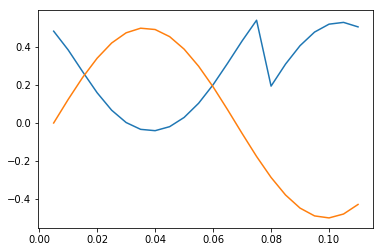

In [286]:
plt.plot(X[1:23].reshape(-1,1),yhat.reshape(-1,1))
plt.plot(X[1:23].reshape(-1,1),subsety[:-1].reshape(-1,1))

In [275]:
X

array([0.00000000e+00, 5.00250125e-03, 1.00050025e-02, ...,
       9.98999500e+00, 9.99499750e+00, 1.00000000e+01])